- ENVISIONING THE ANSWER:
- Asking Question 
- Search for info 
- structure data 
- Envision the answer
- Represent the visualizaion
- Tell The story


- Introduction 
- Motivation  

- Question 
- Data Set Description 

- Data Processing ####
- Visualization/Description
- Quantitative Analysis (numbers)
- Qualitative Analysis (characters)

- Analysis

- Conclusion

# <span style="color:#ff4238;">__CP321 FINAL Project__</span>

#### Authors: Lucas Duncan, Owen Macgowan

#### Date: April 2024

![Friends](https://qph.cf2.quoracdn.net/main-qimg-55f2935b1d162eb07783e02013ca66e9-lq)

---
## <span style="color:#42a2d6;">__Summary of Contents__</span>
#### __Our Final project will cover the following topics:__
1. Introduction + Motivation
2. Research Question
3. Data Set Description + Importing
4. Data Processing
5. Analysis + Visualizations
6. Conclusions

# <span style="color:#f6be00;">__1. Introduction + Motivation__</span>

#### The frequency of dialogue, and frequency across genders, as well as the tone of that dialogue (specically exclamatory dialogue) plays an instrumental role in the plot, emotion, and story of a movie or tv show. These underpinning components of a good tv show, largely impact the perception of the story by the viewer, and subsequently rater, externalized through a rating.

#### As both avid enjoyers of the tv show FRIENDS, we were curious to see what impact the dialogue trends, (some of the most memorable plot in tv history) had on the rating of the episode to which they belonged.


# <span style="color:#06bef0;">__2. Research Question__</span>

### How do trends in speech, specically exclamatory speech, and dialogue length effect episode rating in the series friends as a whole and across seasons/episodes, and what trends can we find in the gender breakdown of this speech?


# <span style="color:#f6beff;">__3. Data Set Importing + Description__</span>

#### The 2 datasets we will use for this project are 2 datasets about the FRIENDS tv show, both from the "rfordatascience" github account (source approved via email)

### Dialogue:  (Data Set 1/2)

#### A dataset representing each contigious line of dialogue within the show, it marks the exact dialogue used "text", the name of the character who said it, "speaker", the "season" and "episode" it occurs in, as well as the numbered "scene" within its episode it belongs to, and its index in that scene "utterance". 

#### NOTE: This dataset also contains rows about scene directions, and background events and noises, which are irrelevant for our purposes, and thus we remove them almost immediatly (see below).

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [194]:
dialogue = pd.read_csv(("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-08/friends.csv"))
dialogue.sample(2)

,text,speaker,season,episode,scene,utterance
36115,Phoebe...,Rachel Green,6,8,3,13
19135,"First of all, it's on your ass.",Dr. Rhodes,3,23,4,7


### Episode Info: (Dataset 2/2)

#### A dataset representing episode level information/statistics for every "season" and "episode". Within each row ("episode"), its episode "title", director name ("directed_by"), and writter ("written_by") are given, as well as its "air_date", the viewing numbers of that airing ("us_views_million"), and its rating by IMDB ("total_exclam_dialogue")

In [195]:
episodes = pd.read_csv(("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-08/friends_info.csv"))
episodes.sample(2)

,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
4,1,5,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,1994-10-20,18.6,8.5
15,1,16,The One with Two Parts: Part 1,Michael Lembeck,Marta Kauffman & David Crane,1995-02-23,26.1,8.2


# <span style="color:#00be00;">__4. Data Processing__</span>

#### This section focuses on formating and aggregating dialogue (speech) into episode level statistics specifically focusing on exclamatory speech within gendered categories.

In [196]:
#Filters Out Non Dialogue Rows
all_dialogue = dialogue[~dialogue["speaker"].isin(["Scene Directions", "#ALL#", "NA"])]

# 6 Main Character Names Divided By Gender
main_character_names_male = ["Ross Geller", "Chandler Bing", "Joey Tribbiani"]
main_character_names_female = ["Monica Geller", "Phoebe Buffay", "Rachel Green"]

In [197]:
#Number of rows with exclamatory text
def exclam_size(text):
    return (text.str.contains(r'[A-Z]{2,}') | text.str.contains(r'!')).sum()

#Groups data by episode
dialogue_stats_by_episode = all_dialogue.groupby(["season", "episode"]).apply(lambda x: pd.Series({
    
        "total_dialogue_male" : x.loc[x["speaker"].isin(main_character_names_male)]["text"].size,
        "total_dialogue_female" : x.loc[x["speaker"].isin(main_character_names_female)]["text"].size,

        "total_exclam_male" : exclam_size(x.loc[x["speaker"].isin(main_character_names_male)]["text"]),
        "total_exclam_female" : exclam_size(x.loc[x["speaker"].isin(main_character_names_female)]["text"])

})).reset_index().sort_values(by=["season", "episode"])
                                                                                                                                                                                                            
dialogue_stats_by_episode.head(2)

C:\Users\ldunc\AppData\Local\Temp\ipykernel_5724\3116006728.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dialogue_stats_by_episode = all_dialogue.groupby(["season", "episode"]).apply(lambda x: pd.Series({


,season,episode,total_dialogue_male,total_dialogue_female,total_exclam_male,total_exclam_female
0,1,1,125,140,27,40
1,1,2,92,80,13,22


In [198]:
#Merges with reviews
joined_table = pd.merge(dialogue_stats_by_episode, episodes, on=["season", "episode"]).drop(columns=["title", "directed_by", 
                                                                                                     "written_by", "air_date", "us_views_millions"])
joined_table.head(2)

,season,episode,total_dialogue_male,total_dialogue_female,total_exclam_male,total_exclam_female,imdb_rating
0,1,1,125,140,27,40,8.3
1,1,2,92,80,13,22,8.1


# <span style="color:#ff0000;">__5. Analysis + Visualizations__</span>

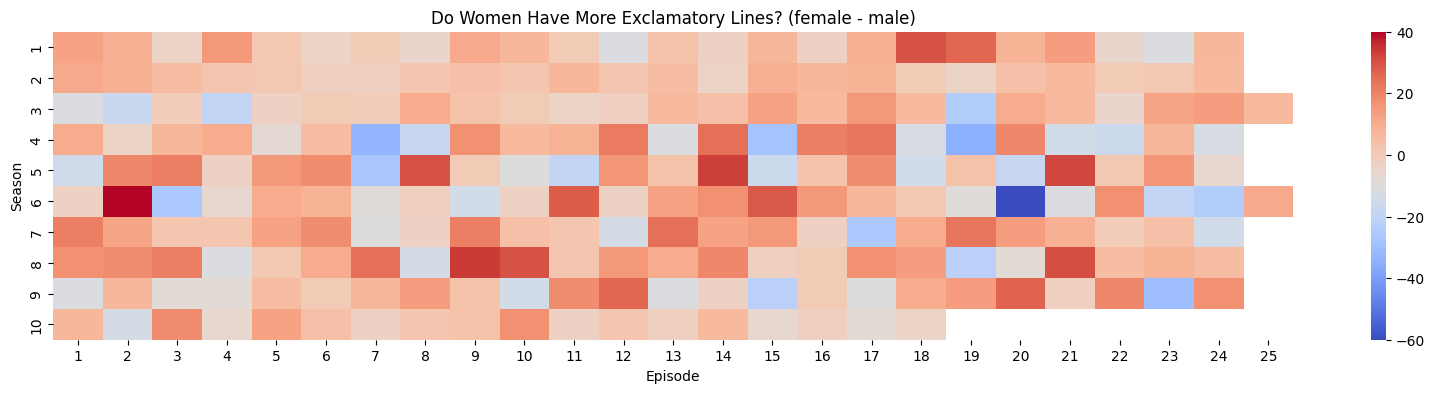

In [199]:
# Pivoting Prep
pivot_df = joined_table.pivot(index='season', columns='episode', values=['total_exclam_male', 'total_exclam_female', 'total_dialogue_male', 'total_dialogue_female'])
joined_table['total_exclam_dialogue'] = (joined_table['total_exclam_male'] + joined_table['total_exclam_female'])/(joined_table['total_dialogue_male'] + joined_table['total_dialogue_female'])

#Returns How Many More EXCLAMATORY lines the girls said compared to the guys
difference_in_exclamatory_utterance = pivot_df['total_exclam_female'] - pivot_df['total_exclam_male']

# Create a heatmap
plt.figure(figsize=(20, 4))
sns.heatmap(difference_in_exclamatory_utterance, cmap='coolwarm', annot=False)
plt.title('Do Women Have More Exclamatory Lines? (female - male)')
plt.xlabel('Episode')
plt.ylabel('Season')
plt.show()

#GRAPH 1 INSIGHT:

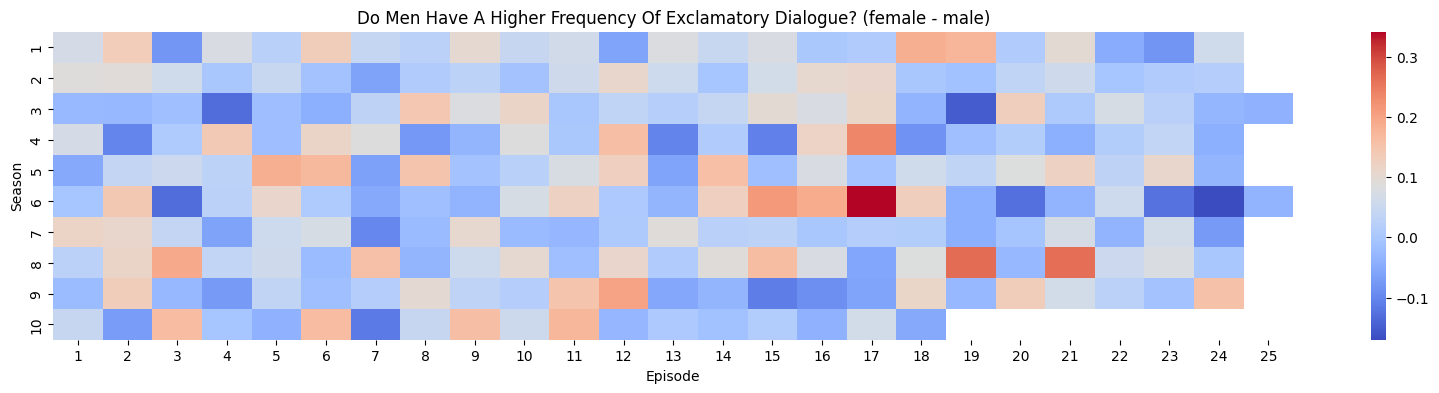

In [200]:
#Returns the difference in fraction of exclamatory speech vs dialogue between the girls and the guys
difference_in_fraction_of_exclamatory_utterance = pivot_df['total_exclam_female']/pivot_df['total_dialogue_female'] - pivot_df['total_exclam_male']/pivot_df['total_dialogue_male']

#Prints Heapmap
plt.figure(figsize=(20, 4))
sns.heatmap(difference_in_fraction_of_exclamatory_utterance, cmap='coolwarm', annot=False)
plt.title('Do Men Have A Higher Frequency Of Exclamatory Dialogue? (female - male)')
plt.xlabel('Episode')
plt.ylabel('Season')
plt.show()

#Graph 2 Insight

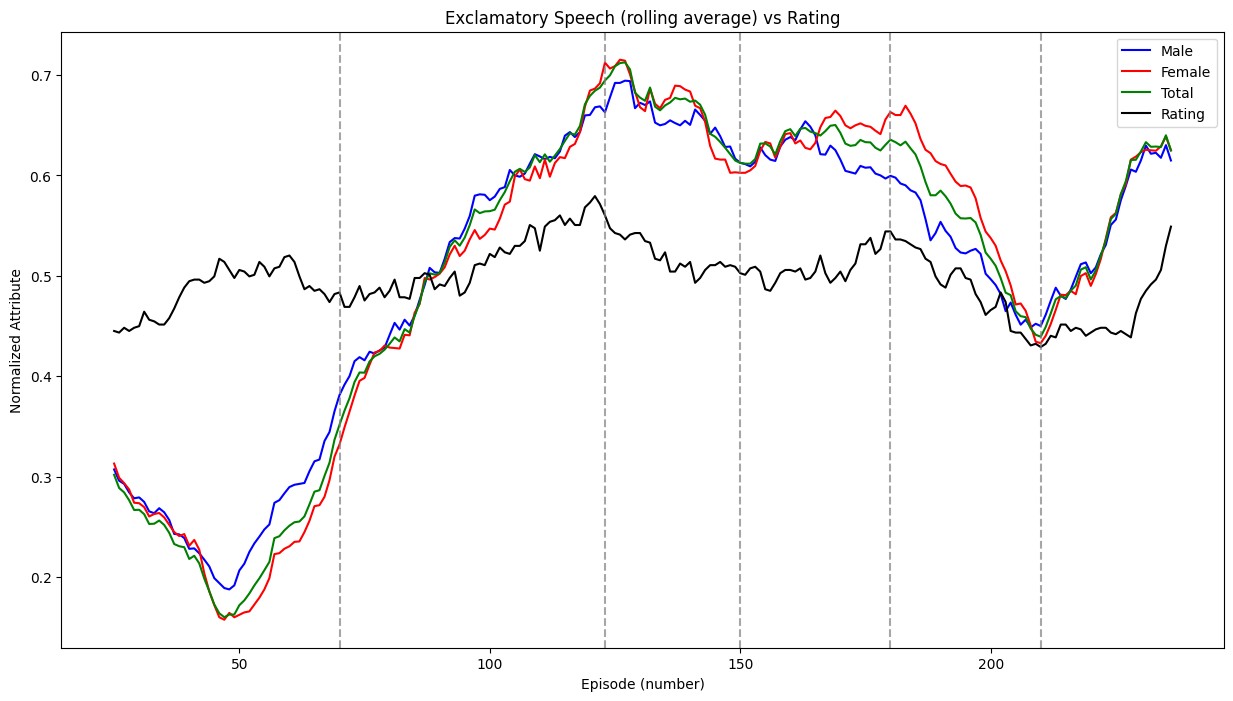

In [201]:
#Obtaining Columns
male = joined_table["total_exclam_male"]
female = joined_table["total_exclam_female"]
total = (male + female)/2
rating = joined_table["imdb_rating"]

#Normalizing Data Between (0-1)
male = (male - male.mean())/(male.max() - male.min()) + 0.5
female = (female - female.mean())/(female.max() - female.min()) + 0.5
total = (total - total.mean())/(total.max() - total.min()) + 0.5
rating = (rating - rating.mean() )/(rating.max() - rating.min()) + 0.5

#Finding the rolling average
window = 25
rolling_male = male.rolling(window=window).mean()
rolling_female = female.rolling(window=window).mean()
rolling_total = total.rolling(window=window).mean()
rolling_rating = rating.rolling(window=window).mean()

#Plotting
plt.figure(figsize=(15, 8))
plt.plot(range(1, len(joined_table) + 1), rolling_male, label="Male", color='blue')
plt.plot(range(1, len(joined_table) + 1), rolling_female, label="Female", color='red')
plt.plot(range(1, len(joined_table) + 1), rolling_total, label="Total", color='green')
plt.plot(range(1, len(joined_table) + 1), rolling_rating, label="Rating", color='black')
plt.legend()
plt.xlabel("Episode (number)")
plt.ylabel("Normalized Attribute")
plt.title("Exclamatory Speech (rolling average) vs Rating")
for episode in [70,123,150, 180, 210]:
    plt.axvline(x=episode, color='gray', linestyle='--', alpha=0.7)

#Graph 3 Insight

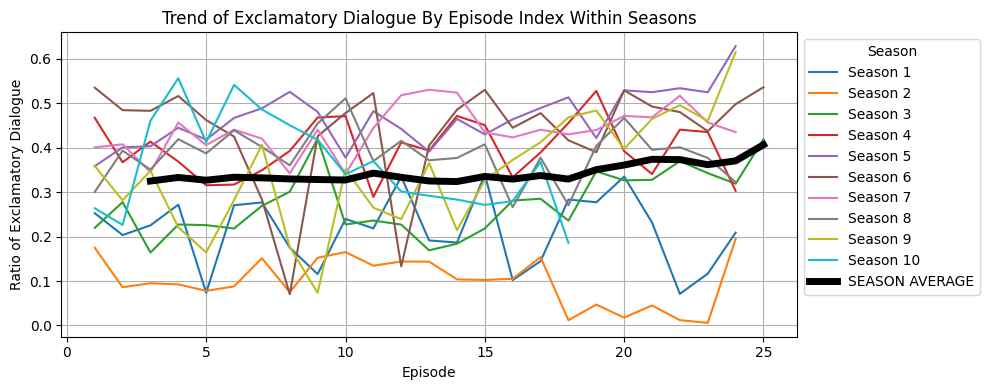

In [208]:

# Line plot for all seasons overlaid
plt.figure(figsize=(10, 4))

# Plotting all seasons' IMDb rating on top of each other
for season in joined_table['season'].unique():
    season_data = joined_table[joined_table['season'] == season].rolling(window=1).mean()
    sns.lineplot(x=range(1, len(season_data) + 1), y='total_exclam_dialogue', data=season_data, label=f'Season {season}')


episode_average = joined_table.groupby(["episode"])["total_exclam_dialogue"].agg("mean").reset_index(name='total_exclam_dialogue').rolling(window=3).mean()
episode_average
sns.lineplot(x=range(1, len(episode_average) + 1), y='total_exclam_dialogue', data=episode_average, label=f'SEASON AVERAGE',linewidth=5, color='black')


plt.xlabel('Episode')
plt.ylabel('Ratio of Exclamatory Dialogue')
plt.title('Trend of Exclamatory Dialogue By Episode Index Within Seasons')
plt.legend(title='Season', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


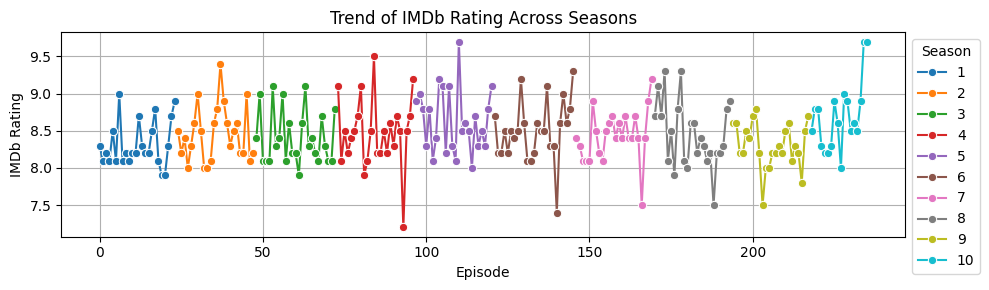

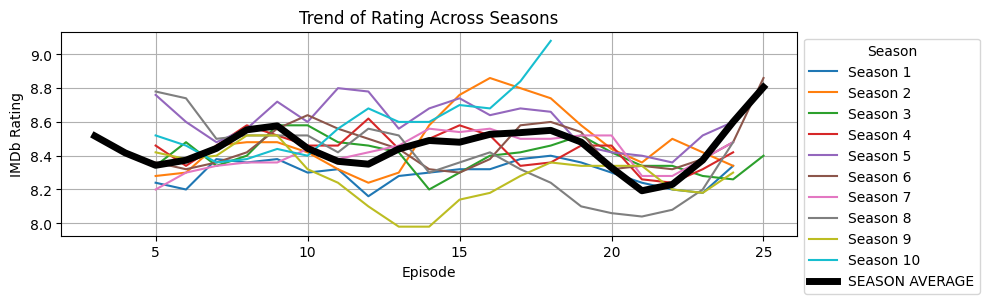

In [212]:

# Line plot for trend of IMDb rating across seasons

# Line plot for trend of IMDb rating across seasons
plt.figure(figsize=(10, 3))
sns.lineplot(x=joined_table.index, y='imdb_rating', hue='season', data=joined_table, marker='o',
             palette=sns.color_palette('tab10', n_colors=joined_table['season'].nunique()))
plt.xlabel('Episode')
plt.ylabel('IMDb Rating')
plt.title('Trend of IMDb Rating Across Seasons')
plt.legend(title='Season', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



# Line plot for all seasons overlaid
plt.figure(figsize=(10, 3))

# Plotting all seasons' IMDb rating on top of each other
for season in joined_table['season'].unique():
    season_data = joined_table[joined_table['season'] == season].rolling(window=5).mean()
    sns.lineplot(x=range(1, len(season_data) + 1), y='imdb_rating', data=season_data, label=f'Season {season}')


episode_average = joined_table.groupby(["episode"])["imdb_rating"].agg("mean").reset_index(name='imdb_rating').rolling(window=3).mean()
sns.lineplot(x=range(1, len(episode_average) + 1), y='imdb_rating', data=episode_average, label=f'SEASON AVERAGE',linewidth=5, color='black')


plt.xlabel('Episode')
plt.ylabel('IMDb Rating')
plt.title('Trend of Rating Across Seasons')
plt.legend(title='Season', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# <span style="color:#06fee0;">__6. Conclusions__</span>

DATA SET: (data set description, search for info, structuring????????)

DATA PRE PROCESSING:

RESULTING VISUALIZATIONS: